In [0]:
import os
from tqdm import tqdm 
import cv2
import scipy
import tflearn
!pip install numpy==1.16.2
import numpy as np
from google.colab import drive
drive.mount('/content/drive')







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import sklearn.preprocessing as prp


In [0]:
import glob
TRAIN_COUNTRY = '/content/drive/My Drive/nirscene1_1gb/country'
TRAIN_FIELD = '/content/drive/My Drive/nirscene1_1gb/field'
TRAIN_FOREST = '/content/drive/My Drive/nirscene1_1gb/forest'
TRAIN_INDOOR = '/content/drive/My Drive/nirscene1_1gb/indoor'
TRAIN_MOUNTAIN = '/content/drive/My Drive/nirscene1_1gb/mountain'
TRAIN_OLDBUILDING = '/content/drive/My Drive/nirscene1_1gb/oldbuilding'
TRAIN_STREET = '/content/drive/My Drive/nirscene1_1gb/street'
TRAIN_URBAN = '/content/drive/My Drive/nirscene1_1gb/urban'
TRAIN_WATER = '/content/drive/My Drive/nirscene1_1gb/water'

country_img = glob.glob(TRAIN_COUNTRY + '/*.tiff')
field_img = glob.glob(TRAIN_FIELD + '/*.tiff')
forest_img = glob.glob(TRAIN_FOREST + '/*.tiff')
indoor_img = glob.glob(TRAIN_INDOOR + '/*.tiff')
mountain_img = glob.glob(TRAIN_MOUNTAIN + '/*.tiff')
oldbuilding_img = glob.glob(TRAIN_OLDBUILDING + '/*.tiff')
street_img = glob.glob(TRAIN_STREET + '/*.tiff')
urban_img = glob.glob(TRAIN_URBAN + '/*.tiff')
water_img = glob.glob(TRAIN_WATER + '/*.tiff')


country_img_sorted = sorted(country_img)
field_img_sorted = sorted(field_img)
forest_img_sorted = sorted(forest_img)
indoor_img_sorted = sorted(indoor_img)
mountain_img_sorted = sorted(mountain_img)
oldbuilding_img_sorted = sorted(oldbuilding_img)
street_img_sorted = sorted(street_img)
urban_img_sorted = sorted(urban_img)
water_img_sorted = sorted(water_img)


(5, 310, 512)


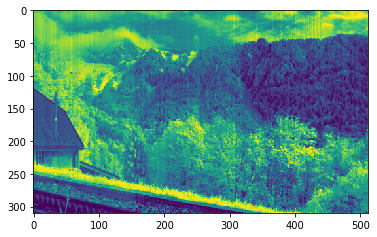

In [0]:
i = 0
L1_bw = []
while(i < 104):
  scale_percent = 50
  x = mpimg.imread(country_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L1_bw.append(imgg)
    i += 2

L1_bw = np.array(L1_bw)

train_country_bw = L1_bw[0:45]
test_country_bw = L1_bw[45:50]

np.save('/content/drive/My Drive/dataset_fin/train_country_bw.npy',train_country_bw)
np.save('/content/drive/My Drive/dataset_fin/test_country_bw.npy',test_country_bw)

    

print(test_country_bw.shape)

imshow(test_country_bw[0])

(50, 310, 512, 3)


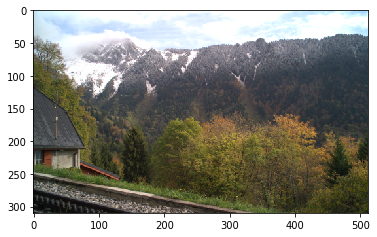

In [0]:
i = 1
L1_color = []
while(i <= 104):
  scale_percent = 50
  x = mpimg.imread(country_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L1_color.append(z2)
    i += 2

L1_color = np.array(L1_color)
print(L1_color.shape) 


train_country_color = L1_color[0:45]
test_country_color = L1_color[45:50]

np.save('/content/drive/My Drive/dataset_fin/train_country_color.npy',train_country_color)
np.save('/content/drive/My Drive/dataset_fin/test_country_color.npy',test_country_color)

imshow(test_country_color[0])

(4, 310, 512)


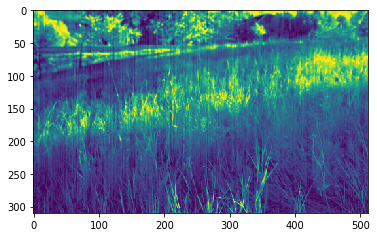

In [0]:
i = 0
L2_bw = []
while(i < 102):
  scale_percent = 50
  x = mpimg.imread(field_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L2_bw.append(imgg)
    i += 2

L2_bw = np.array(L2_bw)

train_field_bw = L2_bw[0:40]
test_field_bw = L2_bw[40:44]

np.save('/content/drive/My Drive/dataset_fin/train_field_bw.npy',train_field_bw)
np.save('/content/drive/My Drive/dataset_fin/test_field_bw.npy',test_field_bw)

print(test_field_bw.shape)
imshow(test_field_bw[0])

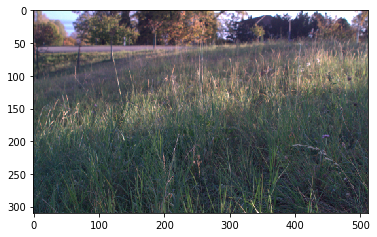

In [0]:
i = 1
L2_color = []
while(i <= 102):
  scale_percent = 50
  x = mpimg.imread(field_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L2_color.append(z2)
    i += 2

L2_color = np.array(L2_color)
 
train_field_color = L2_color[0:40]
test_field_color = L2_color[40:44]

np.save('/content/drive/My Drive/dataset_fin/train_field_color.npy',train_field_color)
np.save('/content/drive/My Drive/dataset_fin/test_field_color.npy',test_field_color)

imshow(test_field_color[0])

(41, 310, 512)


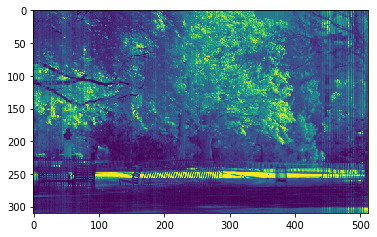

In [0]:
i = 0
L3_bw = []
while(i < 106):
  scale_percent = 50
  x = mpimg.imread(forest_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L3_bw.append(imgg)
    i += 2

L3_bw = np.array(L3_bw)
print(L3_bw.shape)

train_forest_bw = L3_bw[0:36]
test_forest_bw = L3_bw[36:41]

np.save('/content/drive/My Drive/dataset_fin/train_forest_bw.npy',train_forest_bw)
np.save('/content/drive/My Drive/dataset_fin/test_forest_bw.npy',test_forest_bw)

imshow(test_forest_bw[0])

(41, 310, 512, 3)


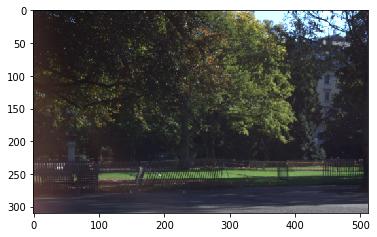

In [0]:
i = 1
L3_color = []
while(i < 106):
  scale_percent = 50
  x = mpimg.imread(forest_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L3_color.append(z2)
    i += 2

L3_color = np.array(L3_color)
print(L3_color.shape)

train_forest_color = L3_color[0:36]
test_forest_color = L3_color[36:41]

np.save('/content/drive/My Drive/dataset_fin/train_forest_color.npy',train_forest_color)
np.save('/content/drive/My Drive/dataset_fin/test_forest_color.npy',test_forest_color)

imshow(test_forest_color[0])

(56, 310, 512)


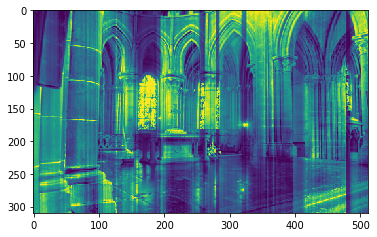

In [0]:
i = 0
L4_bw = []
while(i < 112):
  scale_percent = 50
  x = mpimg.imread(indoor_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L4_bw.append(imgg)
    i += 2

L4_bw = np.array(L4_bw)
print(L4_bw.shape)

train_indoor_bw = L4_bw[0:51]
test_indoor_bw = L4_bw[51:56]

np.save('/content/drive/My Drive/dataset_fin/train_indoor_bw.npy',train_indoor_bw)
np.save('/content/drive/My Drive/dataset_fin/test_indoor_bw.npy',test_indoor_bw)

imshow(test_indoor_bw[0])

(56, 310, 512, 3)


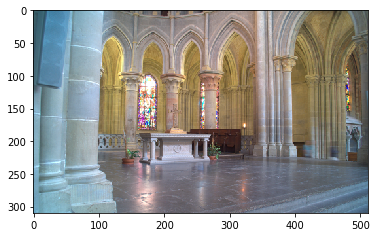

In [0]:
i = 1
L4_color = []
while(i < 112):
  scale_percent = 50
  x = mpimg.imread(indoor_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L4_color.append(z2)
    i += 2

L4_color = np.array(L4_color)
print(L4_color.shape)


train_indoor_color = L4_color[0:51]
test_indoor_color = L4_color[51:56]

np.save('/content/drive/My Drive/dataset_fin/train_indoor_color.npy',train_indoor_color)
np.save('/content/drive/My Drive/dataset_fin/test_indoor_color.npy',test_indoor_color)

imshow(test_indoor_color[0])

(46, 310, 512)


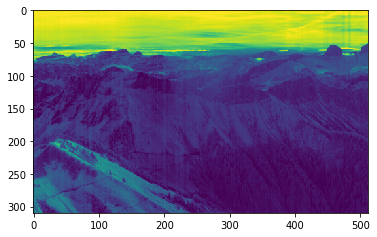

In [0]:
i = 0
L5_bw = []
while(i < 110):
  scale_percent = 50
  x = mpimg.imread(mountain_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L5_bw.append(imgg)
    i += 2

L5_bw = np.array(L5_bw)
print(L5_bw.shape)
#imshow(L5_bw[2])

train_mountain_bw = L5_bw[0:41]
test_mountain_bw = L5_bw[41:46]

np.save('/content/drive/My Drive/dataset_fin/train_mountain_bw.npy',train_mountain_bw)
np.save('/content/drive/My Drive/dataset_fin/test_mountain_bw.npy',test_mountain_bw)

imshow(test_mountain_bw[0])

(46, 310, 512, 3)


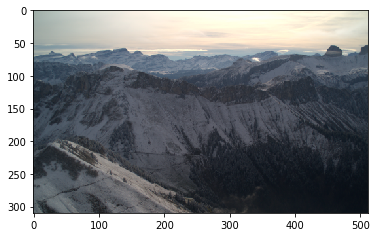

In [0]:

i = 1
L5_color = []
while(i < 110):
  scale_percent = 50
  x = mpimg.imread(mountain_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L5_color.append(z2)
    i += 2

L5_color = np.array(L5_color)
print(L5_color.shape)


train_mountain_color = L5_color[0:41]
test_mountain_color = L5_color[41:46]

np.save('/content/drive/My Drive/dataset_fin/train_mountain_color.npy',train_mountain_color)
np.save('/content/drive/My Drive/dataset_fin/test_mountain_color.npy',test_mountain_color)

imshow(test_mountain_color[0])

(37, 310, 512)


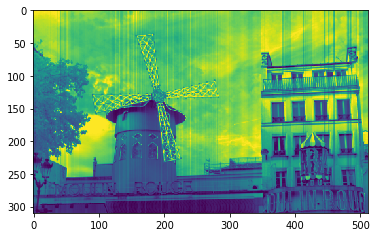

In [0]:
i = 0
L6_bw = []
while(i < 102):
  scale_percent = 50
  x = mpimg.imread(oldbuilding_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2) 
    L6_bw.append(imgg)
    i += 2

L6_bw = np.array(L6_bw)
print(L6_bw.shape)

train_oldbuilding_bw = L6_bw[0:32]
test_oldbuilding_bw = L6_bw[32:37]

np.save('/content/drive/My Drive/dataset_fin/train_oldbuilding_bw.npy',train_oldbuilding_bw)
np.save('/content/drive/My Drive/dataset_fin/test_oldbuilding_bw.npy',test_oldbuilding_bw)

imshow(test_oldbuilding_bw[0])


(37, 310, 512, 3)


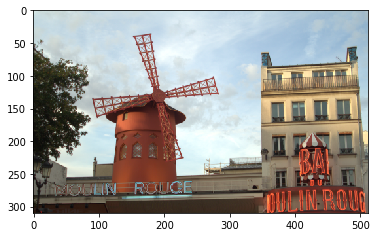

In [0]:
i = 1
L6_color = []
while(i < 102):
  scale_percent = 50
  x = mpimg.imread(oldbuilding_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L6_color.append(z2)
    i += 2

L6_color = np.array(L6_color)
print(L6_color.shape)

train_oldbuilding_color = L6_color[0:32]
test_oldbuilding_color = L6_color[32:37]

np.save('/content/drive/My Drive/dataset_fin/train_oldbuilding_color.npy',train_oldbuilding_color)
np.save('/content/drive/My Drive/dataset_fin/test_oldbuilding_color.npy',test_oldbuilding_color)

imshow(test_oldbuilding_color[0])

(39, 310, 512)


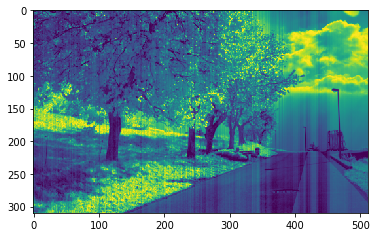

In [0]:
i = 0
L7_bw = []
while(i < 100):
  scale_percent = 50
  x = mpimg.imread(street_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L7_bw.append(imgg)
    i += 2

L7_bw = np.array(L7_bw)
print(L7_bw.shape)

train_street_bw = L7_bw[0:34]
test_street_bw = L7_bw[34:39]

np.save('/content/drive/My Drive/dataset_fin/train_street_bw.npy',train_street_bw)
np.save('/content/drive/My Drive/dataset_fin/test_street_bw.npy',test_street_bw)

imshow(test_street_bw[0])

(39, 310, 512, 3)


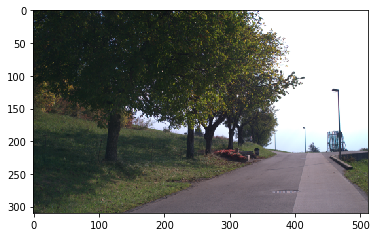

In [0]:
i = 1
L7_color = []
while(i < 100):
  scale_percent = 50
  x = mpimg.imread(street_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L7_color.append(z2)
    i += 2

L7_color = np.array(L7_color)
print(L7_color.shape)

train_street_color = L7_color[0:34]
test_street_color = L7_color[34:39]

np.save('/content/drive/My Drive/dataset_fin/train_street_color.npy',train_street_color)
np.save('/content/drive/My Drive/dataset_fin/test_street_color.npy',test_street_color)


imshow(test_street_color[0])


(42, 310, 512)


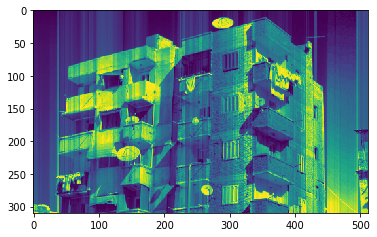

In [0]:
i = 0
L8_bw = []
while(i < 100):
  scale_percent = 50
  x = mpimg.imread(urban_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L8_bw.append(imgg)
    i += 2

L8_bw = np.array(L8_bw)
print(L8_bw.shape)

train_urban_bw = L8_bw[0:37]
test_urban_bw = L8_bw[37:42]

np.save('/content/drive/My Drive/dataset_fin/train_urban_bw.npy',train_urban_bw)
np.save('/content/drive/My Drive/dataset_fin/test_urban_bw.npy',test_urban_bw)

imshow(test_urban_bw[0])

(42, 310, 512)


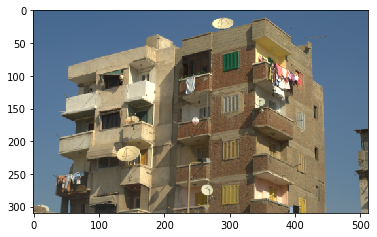

In [0]:
i = 1
L8_color = []
while(i < 100):
  scale_percent = 50
  x = mpimg.imread(urban_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    #z = prp.scale(y)
    z2 = y[0:310,0:512]
    L8_color.append(z2)
    i += 2

L8_color = np.array(L8_color)
print(L8_bw.shape)

train_urban_color = L8_color[0:37]
test_urban_color = L8_color[37:42]

np.save('/content/drive/My Drive/dataset_fin/train_urban_color.npy',train_urban_color)
np.save('/content/drive/My Drive/dataset_fin/test_urban_color.npy',test_urban_color)

imshow(test_urban_color[0])

(39, 310, 512)


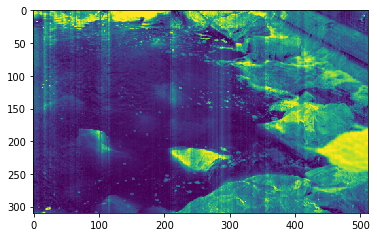

In [0]:
i = 0
L9_bw = []
while(i < 100):
  scale_percent = 50
  x = mpimg.imread(water_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z = prp.scale(y)
    z2 = z[0:310,0:512]
    min_max_scaler = prp.MinMaxScaler()
    imgg = min_max_scaler.fit_transform(z2)
    L9_bw.append(imgg)
    i += 2

L9_bw = np.array(L9_bw)
print(L9_bw.shape)

train_water_bw = L9_bw[0:34]
test_water_bw = L9_bw[34:39]

np.save('/content/drive/My Drive/dataset_fin/train_water_bw.npy',train_water_bw)
np.save('/content/drive/My Drive/dataset_fin/test_water_bw.npy',test_water_bw)

imshow(test_water_bw[0])

In [0]:
i = 1
L9_color = []
while(i < 100):
  scale_percent = 50
  x = mpimg.imread(water_img_sorted[i])
  width = int(x.shape[1] * scale_percent / 100)
  height = int(x.shape[0] * scale_percent / 100)
  if(x.shape[1] != 1024 or x.shape[0] >= 700):
    i += 2
  else:
    x1 = x[0:678,0:1024] 
    dim = (width, height)    
    y = cv2.resize(x1,dim,interpolation=cv2.INTER_AREA)
    z2 = y[0:310,0:512]
    L9_color.append(z2)
    i += 2

L9_color = np.array(L9_color)
print(L9_color.shape)

train_water_color = L9_color[0:34]
test_water_color = L9_color[34:39]

np.save('/content/drive/My Drive/dataset_fin/train_water_color.npy',train_water_color)
np.save('/content/drive/My Drive/dataset_fin/test_water_color.npy',test_water_color)

print(np.min(test_water_bw[0]))

(39, 310, 512, 3)
0.0


In [0]:
a=[0,0,0,0,0,0,0,0,0];
a[0]=np.load('/content/drive/My Drive/dataset_fin/train_country_bw.npy')
a[1]=np.load('/content/drive/My Drive/dataset_fin/train_field_bw.npy')
a[2]=np.load('/content/drive/My Drive/dataset_fin/train_forest_bw.npy')
a[3]=np.load('/content/drive/My Drive/dataset_fin/train_indoor_bw.npy')
a[4]=np.load('/content/drive/My Drive/dataset_fin/train_mountain_bw.npy')
a[5]=np.load('/content/drive/My Drive/dataset_fin/train_oldbuilding_bw.npy')
a[6]=np.load('/content/drive/My Drive/dataset_fin/train_street_bw.npy')
a[7]=np.load('/content/drive/My Drive/dataset_fin/train_urban_bw.npy')
#a[8]=np.load('/content/drive/My Drive/dataset_fin/train_water_bw.npy')
j=0
Q1=[]
for j in range(0,9):
  Q1.append(a[j]);


Train_bw=[]
Test_bw=[]

for k1 in range(0,8):
   for m in range(0,(len(a[k1])-5)):
     Train_bw.append(a[k1][m])
print(len(Train_bw))


for k2 in range(0,8):
   for m2 in range(0,5):

     Test_bw.append(a[k2][(len(a[k2])-6)+m2])
print(len(Test_bw))



np.save('/content/drive/My Drive/dataset_fin/train_bw_fin.npy',Train_bw)
np.save('/content/drive/My Drive/dataset_fin/test_bw_fin.npy',Test_bw)


# print(len(a10))
# print(len(b10))




# plt.figure(2)
# imshow(b[0])
# plt.figure(3)
# imshow(c[0])
# plt.figure(4)
# imshow(d[0])
# plt.figure(5)
# imshow(e[0])
# plt.figure(6)
# imshow(f[0])
# plt.figure(7)
# imshow(g[0])
# plt.figure(8)
# imshow(h[0])
# plt.figure(9)
# imshow(i[0])

276
40


In [0]:
b=[0,0,0,0,0,0,0,0,0]
b[0]=np.load('/content/drive/My Drive/dataset_fin/train_country_color.npy')
b[1]=np.load('/content/drive/My Drive/dataset_fin/train_field_color.npy')
b[2]=np.load('/content/drive/My Drive/dataset_fin/train_forest_color.npy')
b[3]=np.load('/content/drive/My Drive/dataset_fin/train_indoor_color.npy')
b[4]=np.load('/content/drive/My Drive/dataset_fin/train_mountain_color.npy')
b[5]=np.load('/content/drive/My Drive/dataset_fin/train_oldbuilding_color.npy')
b[6]=np.load('/content/drive/My Drive/dataset_fin/train_street_color.npy')
b[7]=np.load('/content/drive/My Drive/dataset_fin/train_urban_color.npy')
b[8]=np.load('/content/drive/My Drive/dataset_fin/train_water_color.npy')
Q2=[]
k=0
for k in range(0,9):
  Q2.append(b[k]);
Q2

Train_color=[]
Test_color=[]
k1=0
k2=0
m=0
m2=0

for k1 in range(0,8):
   for m in range(0,(len(b[k1])-5)):
     Train_color.append(b[k1][m])
print(len(Train_color))


for k2 in range(0,8):
   for m2 in range(0,5):

     Test_color.append(b[k2][(len(b[k2])-6)+m2])
print(len(Test_color))


x1 = []
x2 = []
x3 = []

# for i in range(len(Train_color)):
#   x = Train_color[i]
#   a = x[:,:,:,0]
#   b = x[:,:,:,1]
#   c = x[:,:,:,2]
#   x1.append(a)
#   x2.append(b)
#   x3.append(c)

Train_color=np.array(Train_color)
Test_color=np.array(Test_color)
chan1_train = (Train_color[:,:,:,0])
chan2_train = (Train_color[:,:,:,1])
chan3_train = (Train_color[:,:,:,2])

np.save('/content/drive/My Drive/dataset_fin/color_chan_train.npy',Train_color)
np.save('/content/drive/My Drive/dataset_fin/r_chan_train.npy',chan1_train)
np.save('/content/drive/My Drive/dataset_fin/g_chan_train.npy',chan2_train)
np.save('/content/drive/My Drive/dataset_fin/b_chan_train.npy',chan3_train)


chan1_test = (Test_color[:,:,:,0])
chan2_test = (Test_color[:,:,:,1])
chan3_test = (Test_color[:,:,:,2])

np.save('/content/drive/My Drive/dataset_fin/color_chan_test.npy',Test_color)
np.save('/content/drive/My Drive/dataset_fin/r_chan_test.npy',chan1_test)
np.save('/content/drive/My Drive/dataset_fin/g_chan_test.npy',chan2_test)
np.save('/content/drive/My Drive/dataset_fin/b_chan_test.npy',chan3_test)



#for i in range()
# plt.figure(2)
# imshow(b[0])
# plt.figure(3)
# imshow(c[0])
# plt.figure(4)
# imshow(d[0])
# plt.figure(5)
# imshow(e[0])
# plt.figure(6)
# imshow(f[0])
# plt.figure(7)
# imshow(g[0])
# plt.figure(8)
# imshow(h[0])
# plt.figure(9)
# imshow(i[0])

276
40


# Convolutional Neural Network - ASB

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Activation ,Flatten , Conv1D ,MaxPooling2D,Conv2D,MaxPooling1D
from keras.utils import plot_model
from keras.engine import InputLayer

#data
bw_data     =  np.load('preprocessed_L1.npy')              ## b/w image
col_data    =  np.load('preprocessed_targets.npy')   ##color images 


img_cols = 512
img_rows = 339

#bw_data = bw_data.reshape(50, img_rows , img_cols, 1)
# col_data =  col_data[0].reshape()   ##color images 

print("The input data array is shaped:" + str(bw_data.shape))
print("The target data array is shaped:" + str(col_data.shape))

ip_shape=(img_cols, img_rows, 1)

model = tf.keras.models.Sequential()
# model.add()
#keras.layers.Conv1D(filters_size,kernel_size,padding = 'same')

#model.add(InputLayer(input_shape=(339, 512, 1)))
#model.add(Input((339,512,1)))
# first convolutional block nf1 = 16 nk = 3x3 

model.add(  Conv2D( 16, kernel_size=(3,3) ,input_shape=(339,512,1),padding = 'same' ))   # add input_shape = X.shape()
model.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same' ))   # add input_shape = X.shape()
model.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same' ))   # add input_shape = X.shape()
model.add( Activation("relu") )

# #first pooling layer   size = 2x2
model.add( MaxPooling2D(pool_size=(2,2) ,padding = 'same'))

#print(ip_shape)

#second convolutional block nf2 = 32,nk= 3x3
model.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same'))
model.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same'))
model.add(  Conv2D( 32, kernel_size=(3,3) ,padding = 'same'))
model.add( Activation("relu") )


#second pooling layer   size = 2x2
model.add( MaxPooling2D(pool_size=(2,2),padding = 'same') )

#third and final convolutional block nf3= 64,nk = 3x3
model.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same'))
model.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same'))
model.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same'))
model.add( Activation("relu") ) 

# #fully connected layer
print(model.output_shape)
#model.add(Flatten())
print(model.input_shape)



model.add( Dense(3, activation='relu') )
#model.add( Dense(3, activation='relu') )
#model.add(Dense(1, input_shape = (339,512,3), activation='relu'))
#model.add(Dense(3,  activation='relu' ))
print(model.summary())

# # train!!
model.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.RMSprop(lr=0.0035),metrics=['accuracy'])
#model.fit(x = bw_data, y = col_data , epochs = 2 , verbose = 2 , validation_split = 0) 